In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.style as style

from sklearn.preprocessing import StandardScaler
from scipy.stats import stats
import math
import statistics as st
from scipy.stats.mstats import mquantiles
from scipy.stats import iqr
from scipy.stats import pearsonr


from sklearn.model_selection import train_test_split,GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

sns.set_palette('Set3')
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Holiday_Package.csv')

In [3]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [5]:
df.describe()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,436.500000,47729.172018,39.955275,9.307339,0.311927,0.982798
std,251.869014,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1.000000,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,218.750000,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,436.500000,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,654.250000,53469.500000,48.000000,12.000000,0.000000,2.000000
max,872.000000,236961.000000,62.000000,21.000000,3.000000,6.000000


In [6]:
df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(872, 8)

In [9]:
df.size

6976

In [10]:
(df==0).sum()

Unnamed: 0             0
Holliday_Package       0
Salary                 0
age                    0
educ                   0
no_young_children    665
no_older_children    393
foreign                0
dtype: int64

In [11]:
df['Holliday_Package'].value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [12]:
df['Holliday_Package'].value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [13]:
df['foreign'].value_counts()

no     656
yes    216
Name: foreign, dtype: int64

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insights: </b><br>1. Total of 8 columns with 872 rows are present.
        <br>2. There are 6 Integer and 2 object columns.
        <br>3. Holiday_package column has been wrongly spelled and needs to be corrected.
        <br>4. There are no duplicate rows present in the dataset
        <br>5. There are no missing values present in the dataset.
        <br>6. Holiday_Package is the response variable and the dataset is very much balanced for this response variable.
    </span>    
</div

In [14]:
# Correct the spelling in Holliday_Package column
df.rename(columns = {'Holliday_Package ': 'Holiday_Package'}, inplace = True)

In [15]:
df.columns

Index(['Unnamed: 0', 'Holliday_Package', 'Salary', 'age', 'educ',
       'no_young_children', 'no_older_children', 'foreign'],
      dtype='object')

In [16]:
def zero_count(_series):
    counter=0
    for val in _series:
        if val==0:
            counter+=1
    return counter 

def negative_count(_series):
    counter=0
    for val in _series:
        if val < 0:
            counter+=1
    return counter 

def percent_outlier(_series):
    counter = 0
    lb = np.percentile(_series,.25) - (1.5*iqr(_series))
    ub = np.percentile(_series,.75) + (1.5*iqr(_series))
    for val in _series:
        if val>ub or val<lb: 
            counter=counter+1
        else : pass
    return 100*counter/len(_series)

stat_list = ['TOTAL RECORDS',
 'NULL COUNT',
 'ZERO COUNT',
 'NEGATIVE COUNT',
 'MIN',
 'MAX',
 'RANGE',
 'MEAN',
 'MEDIAN',
 'MODE',
 'VARIANCE',
 'STD DEV',
 'Q1',
 'Q3',
 'IQR',
 'SKEWNESS',
 'KURTOSIS']

def stat_function(_series):
    return [round(val,2) for val in 
          [len(_series),
           _series.isna().sum(),
           zero_count(_series),
           negative_count(_series),
           min(_series),
           max(_series),
           max(_series)-min(_series),
           _series.mean(),
           np.percentile(_series,.5),
           _series.mode()[0],
           st.variance(_series),
           st.stdev(_series),
           np.percentile(_series,.25),
           np.percentile(_series,.75),
           iqr(_series),
           stats.skew(_series),
           stats.kurtosis(_series)]
          ]

def stat_df(data, feature_list):
    stat_dictionary = {}
    for x in feature_list:
        stat_dictionary[x] = stat_function(data[x])
    return pd.DataFrame(stat_dictionary, index = stat_list).T

# Finding % Outliers in our Data
def outlier_percentage_df(data, features_list):
    dict_outlier = {}
    for x in features_list:
        dict_outlier[x]=round(percent_outlier(data[x]),2)
    return pd.DataFrame(dict_outlier, index=["% OUTLIERS"]).T.sort_values("% OUTLIERS", ascending=False)

In [17]:
categoriacl_features=[]
numerical_features=[]
for i in df.columns:
    if df[i].dtype=="object":
        categoriacl_features.append(i)
    else:
        numerical_features.append(i)
print(categoriacl_features) 
print(numerical_features)

['Holliday_Package', 'foreign']
['Unnamed: 0', 'Salary', 'age', 'educ', 'no_young_children', 'no_older_children']


In [18]:
stat_df(df, numerical_features).T


,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
TOTAL RECORDS,872.00,8.720000e+02,872.00,872.00,872.00,872.00
NULL COUNT,0.00,0.000000e+00,0.00,0.00,0.00,0.00
ZERO COUNT,0.00,0.000000e+00,0.00,0.00,665.00,393.00
NEGATIVE COUNT,0.00,0.000000e+00,0.00,0.00,0.00,0.00
MIN,1.00,1.322000e+03,20.00,1.00,0.00,0.00
MAX,872.00,2.369610e+05,62.00,21.00,3.00,6.00
RANGE,871.00,2.356390e+05,42.00,20.00,3.00,6.00
MEAN,436.50,4.772917e+04,39.96,9.31,0.31,0.98
MEDIAN,5.36,1.308032e+04,20.00,2.00,0.00,0.00
MODE,1.00,3.219700e+04,44.00,8.00,0.00,0.00


In [19]:
outlier_percentage_df(df, numerical_features)

,% OUTLIERS
educ,60.55
Salary,51.83
age,34.40
Unnamed: 0,24.31
no_young_children,23.74
no_older_children,2.06


In [20]:
# Putting all Categorical columns in one dataframe
df_num=df.drop(['Unnamed: 0','Holliday_Package','foreign'],axis=1)

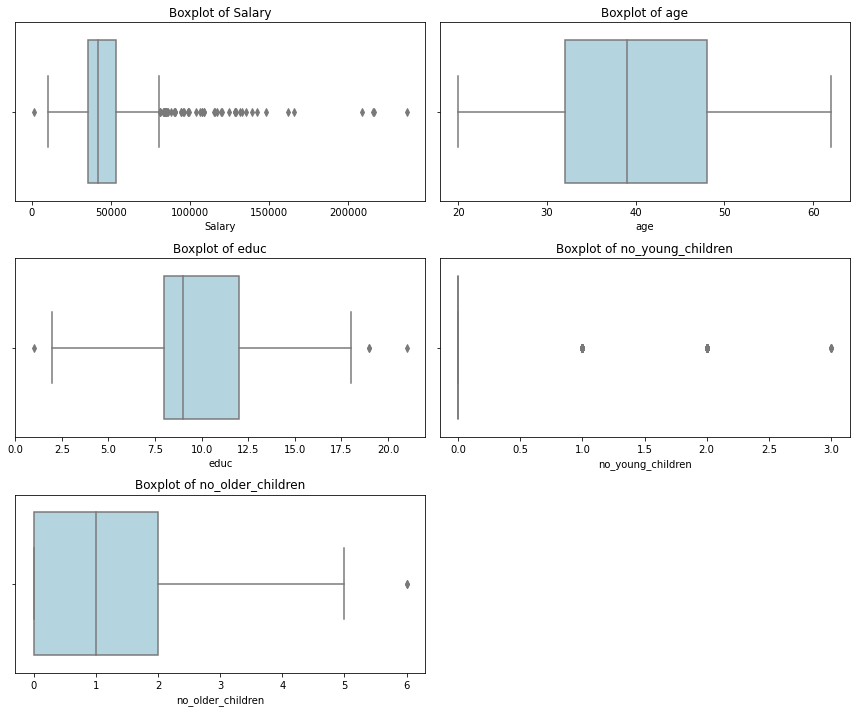

In [21]:
plt.figure(figsize=(12,10))
list_of_column=df_num.columns

for i in range(len(list_of_column)):
    plt.subplot(3,2,i+1)
    sns.boxplot(x = df_num[list_of_column[i]],data=df_num,color='lightblue')
    plt.title('Boxplot of {}'.format(list_of_column[i]))
    plt.tight_layout()

In [22]:
# Putting all Numerical columns in one dataframe
df_cat=df[['Holliday_Package','foreign']]

In [23]:
df_cat.head()

,Holliday_Package,foreign
0,no,no
1,yes,no
2,no,no
3,no,no
4,no,no


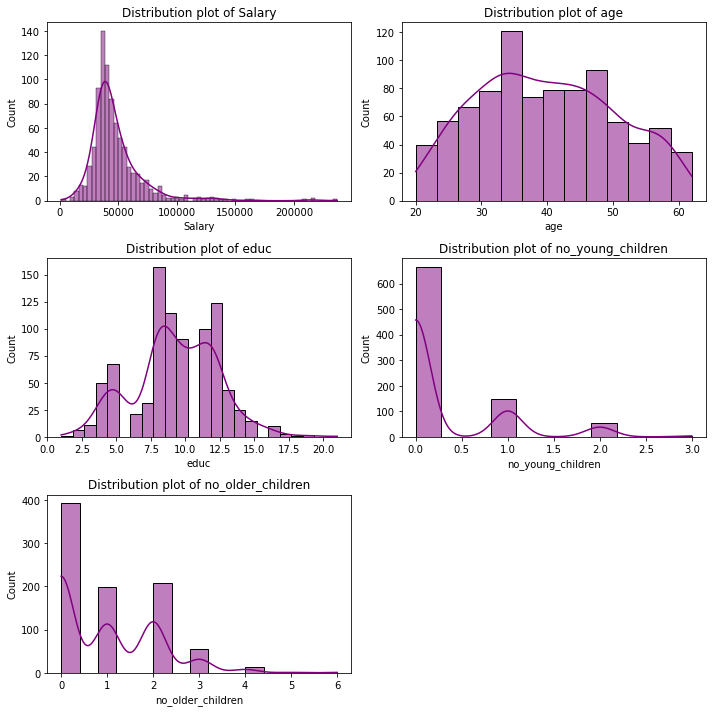

In [24]:
plt.figure(figsize=(10,10))
list_of_column=df_num.columns

for i in range(len(list_of_column)):
    plt.subplot(3,2,i+1)
    sns.histplot(x = df_num[list_of_column[i]],data=df_num,kde=True,color='purple')
    plt.title('Distribution plot of {}'.format(list_of_column[i]))
    plt.tight_layout()
    

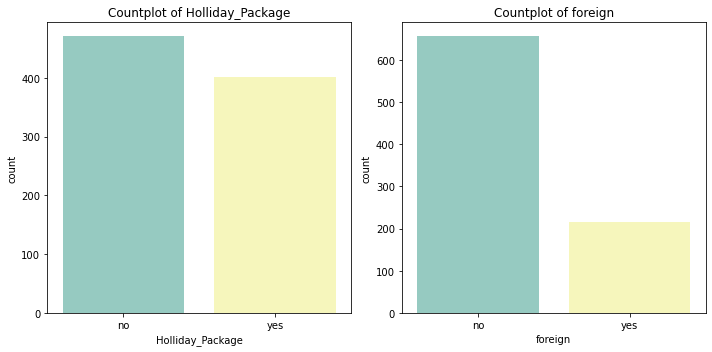

In [25]:
plt.figure(figsize=(10,5))
list_of_column=df_cat.columns

for i in range(len(list_of_column)):
    plt.subplot(1,2,i+1)
    sns.countplot(x = df_cat[list_of_column[i]],data=df_cat)
    plt.title('Countplot of {}'.format(list_of_column[i]))
    plt.tight_layout()

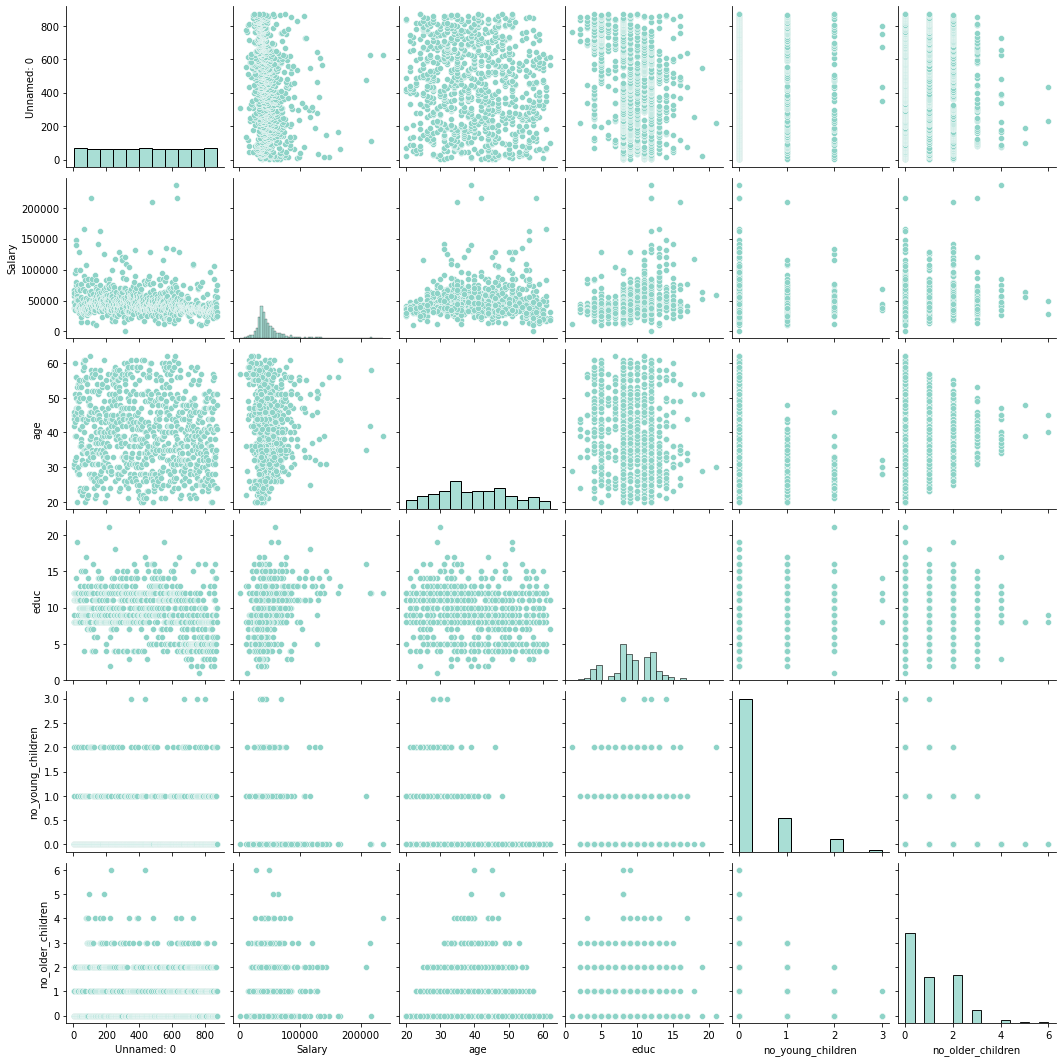

In [26]:
sns.pairplot(df)
plt.show();

<AxesSubplot:xlabel='Holliday_Package', ylabel='Salary'>

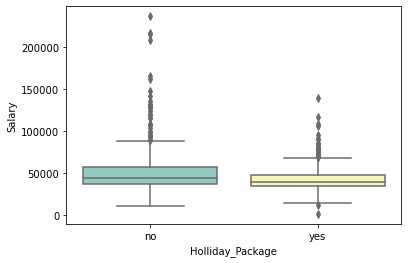

In [27]:
sns.boxplot(df['Holliday_Package'],df['Salary'])

<AxesSubplot:xlabel='Holliday_Package', ylabel='age'>

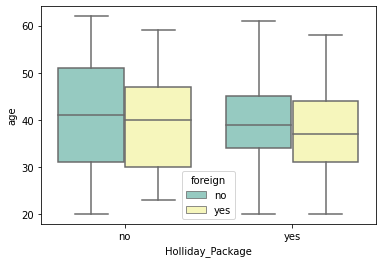

In [28]:
sns.boxplot(df['Holliday_Package'],df['age'],hue=df['foreign'])

<AxesSubplot:xlabel='Holliday_Package', ylabel='no_older_children'>

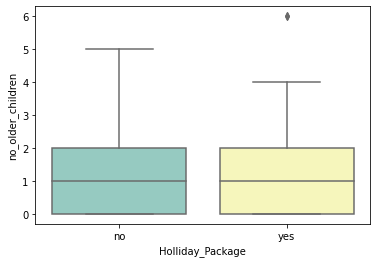

In [29]:
sns.boxplot(df['Holliday_Package'],df['no_older_children'])

<AxesSubplot:xlabel='Holliday_Package', ylabel='no_young_children'>

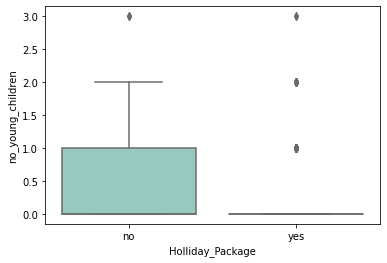

In [30]:
sns.boxplot(df['Holliday_Package'],df['no_young_children'])

In [31]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [32]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [33]:
df.corr()

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000


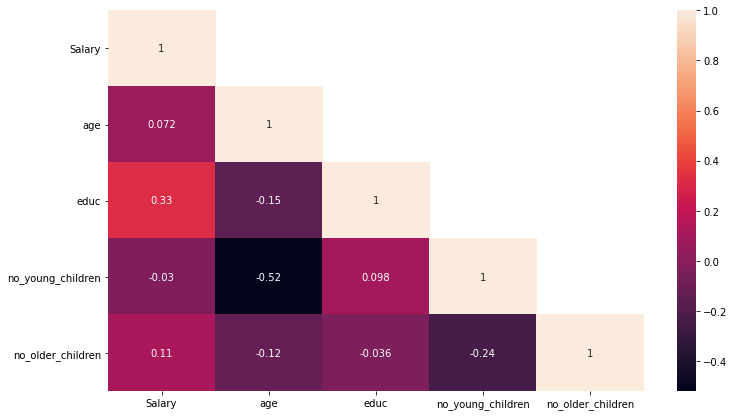

In [34]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True,mask=np.triu(df.corr(),+1));

In [35]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


In [36]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [37]:
df.columns = df.columns.str.replace('_', '')

In [38]:
df.columns

Index(['HollidayPackage', 'Salary', 'age', 'educ', 'noyoungchildren',
       'noolderchildren', 'foreign'],
      dtype='object')

In [39]:
import statsmodels.formula.api as sm

In [40]:
Z = df[['HollidayPackage', 'Salary', 'age', 'educ', 'noyoungchildren','noolderchildren', 'foreign']]

In [41]:
def vif_cal(Z):
    x_var =Z
    xvar_names = Z.columns
    vif = pd.DataFrame()
    for i in range(0, xvar_names.shape[0]):
        y=x_var[xvar_names[i]]
        x = x_var[xvar_names.drop(xvar_names[i])]
        rsq =sm.ols(formula ="y~x", data =x_var).fit().rsquared
        vif = round(1/(1-rsq),2)
        print(xvar_names[i], 'VIF = ' , vif)

In [42]:
vif_cal(Z = df[['HollidayPackage', 'Salary', 'age', 'educ', 'noyoungchildren','noolderchildren', 'foreign']])

HollidayPackage VIF =  1.19
Salary VIF =  1.2
age VIF =  1.63
educ VIF =  1.41
noyoungchildren VIF =  1.69
noolderchildren VIF =  1.19
foreign VIF =  1.34


### Train Test Split


In [43]:
# Copy all the predictor variables into X dataframe
X = df.drop('HollidayPackage', axis=1)

# Copy target into the y dataframe. 
y = df['HollidayPackage']

In [44]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [45]:
y_train.value_counts(1)

0    0.539344
1    0.460656
Name: HollidayPackage, dtype: float64

In [46]:
y_test.value_counts(1)

0    0.541985
1    0.458015
Name: HollidayPackage, dtype: float64

In [47]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.6s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [48]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [49]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.685333,0.314667
1,0.539554,0.460446
2,0.697025,0.302975
3,0.496433,0.503567
4,0.557712,0.442288


In [50]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6672131147540984

AUC: 0.735


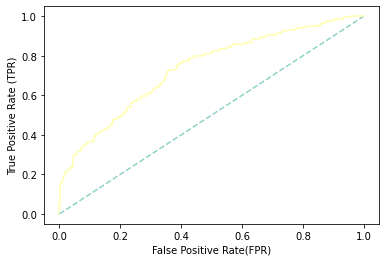

In [51]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate (TPR)");

In [52]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6526717557251909

AUC: 0.735


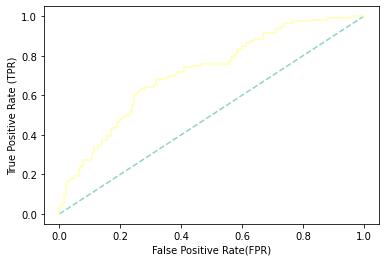

In [53]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate (TPR)");

In [54]:
confusion_matrix(y_train, ytrain_predict)

array([[244,  85],
       [118, 163]])

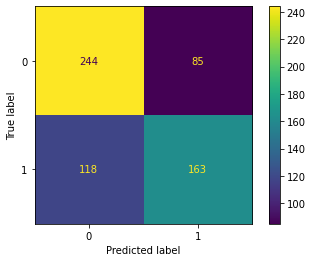

In [55]:
plot_confusion_matrix(model,X_train,y_train);

In [56]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



In [57]:
confusion_matrix(y_test, ytest_predict)

array([[109,  33],
       [ 58,  62]])

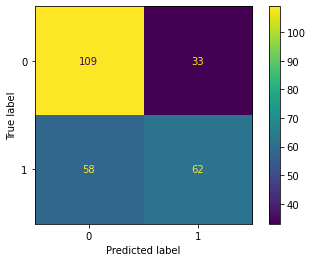

In [58]:
plot_confusion_matrix(model,X_test,y_test);

In [59]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262



## Applying GridSearchCV for Logistic Regression

In [60]:
grid={'penalty':['l2','none'],
      'solver':['newton-cg','sag','saga'],
      'tol':[0.0001,0.001]}

In [61]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [62]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5,n_jobs=-1,scoring='f1')
## Scoring - Strategy to evaluate the performance of the cross-validated model on the test set.

In [63]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'sag', 'saga'],
                         'tol': [0.0001, 0.001]},
             scoring='f1')

In [64]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg')


In [65]:
best_model = grid_search.best_estimator_

In [66]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [67]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.685333,0.314667
1,0.539554,0.460446
2,0.697025,0.302975
3,0.496433,0.503567
4,0.557712,0.442288


              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610
 



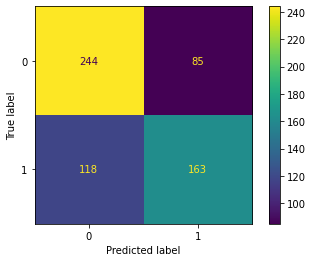

In [68]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262
 



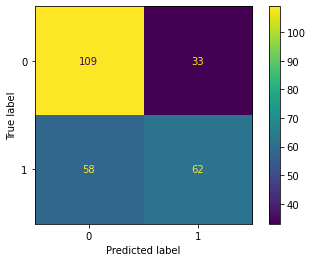

In [279]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

In [69]:
import statsmodels.formula.api as sm

In [70]:
A1 = 'HollidayPackage ~Salary+age+educ+noyoungchildren+noolderchildren+foreign'

In [72]:
model_1 = sm.logit(formula =A1, data =df).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.601531
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        HollidayPackage   No. Observations:                  872
Model:                          Logit   Df Residuals:                      865
Method:                           MLE   Df Model:                            6
Date:                Sun, 23 Jan 2022   Pseudo R-squ.:                  0.1281
Time:                        17:38:44   Log-Likelihood:                -524.53
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 1.023e-30
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.3259      0.554      4.199      0.000       1.240       3.411
Salary          -1.814e-05   4.35e-06     -4.169      0.000   -2.67e-05   -9.61e-06
age                -0.0482      0.009     -5.314      0.000      -0.066      -0.030
educ                0.0392      0.029      1.337      0.181      -0.018       0.097
noyoungchildren    -1.3173      0.180     -7.326      0.000      -1.670      -0.965
noolderchildren    -0.0204      0.074     -0.276      0.782      -0.165       0.124
foreign             1.3216      0.200      6.601      0.000       0.929       1.714
===================================================================================
"""

# LDA

In [73]:
df.head()

,HollidayPackage,Salary,age,educ,noyoungchildren,noolderchildren,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


### Treating Outliers

In [74]:
df_o=df.copy(deep=True)

In [75]:
df_o.head()

,HollidayPackage,Salary,age,educ,noyoungchildren,noolderchildren,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [76]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [77]:
lrsalary,ursalary=remove_outlier(df_o['Salary'])
df_o['Salary']=np.where(df_o['Salary']>ursalary,ursalary,df_o['Salary'])
df_o['Salary']=np.where(df_o['Salary']<lrsalary,lrsalary,df_o['Salary'])

lreduc,ureduc=remove_outlier(df_o['educ'])
df_o['educ']=np.where(df_o['educ']>ureduc,ureduc,df_o['educ'])
df_o['educ']=np.where(df_o['educ']<lreduc,lreduc,df_o['educ'])

lryoung,uryoung=remove_outlier(df_o['noyoungchildren'])
df_o['noyoungchildren']=np.where(df_o['noyoungchildren']>uryoung,uryoung,df_o['noyoungchildren'])
df_o['noyoungchildren']=np.where(df_o['noyoungchildren']<lryoung,lryoung,df_o['noyoungchildren'])

lrold,urold=remove_outlier(df_o['noolderchildren'])
df_o['noolderchildren']=np.where(df_o['noolderchildren']>urold,urold,df_o['noolderchildren'])
df_o['noolderchildren']=np.where(df_o['noolderchildren']<lrold,lrold,df_o['noolderchildren'])


<AxesSubplot:>

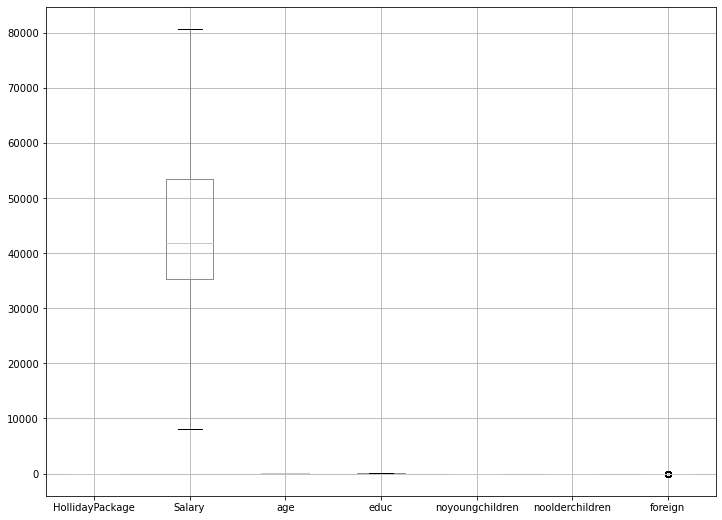

In [78]:
df_o.boxplot(figsize=(12,9))

In [79]:
X = df_o.drop('HollidayPackage',axis=1)
Y = df_o.pop('HollidayPackage')

In [80]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [81]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262,)


In [82]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [83]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

### Training Data and Test Data Confusion Matrix Comparison

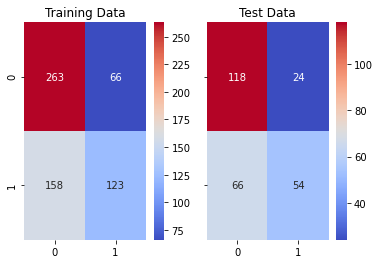

In [84]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data');

# ".g" - general expression -  help in converting scientific expression into numbers example 5.23 e-03 = 523 

In [85]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.62      0.80      0.70       329
           1       0.65      0.44      0.52       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.61       610
weighted avg       0.64      0.63      0.62       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262
 



### Probability prediction for the training and test data


In [86]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [87]:
pred_prob_train[:,1]

array([0.73614833, 0.64936462, 0.45296681, 0.67842845, 0.66903745,
       0.3774365 , 0.32146187, 0.43700845, 0.3601507 , 0.62535644,
       0.23288822, 0.26149271, 0.44813877, 0.48143931, 0.29614015,
       0.46145671, 0.43653859, 0.30536315, 0.54175682, 0.66481517,
       0.49405489, 0.31531235, 0.75146336, 0.43228357, 0.31741838,
       0.74742033, 0.24732567, 0.7256214 , 0.49778025, 0.4701221 ,
       0.2458476 , 0.59535195, 0.39263888, 0.38905706, 0.34870239,
       0.34966751, 0.47524197, 0.50165433, 0.47132887, 0.20930823,
       0.22990207, 0.67104116, 0.40365647, 0.62197077, 0.64959972,
       0.34741408, 0.34082919, 0.73390632, 0.42023771, 0.62369484,
       0.57834131, 0.3978419 , 0.49066256, 0.40405466, 0.22000295,
       0.41866697, 0.25849518, 0.5276083 , 0.6674488 , 0.40702718,
       0.59934243, 0.26473066, 0.43421298, 0.34478906, 0.5114521 ,
       0.53275226, 0.41995444, 0.49835656, 0.40640466, 0.33834489,
       0.25698034, 0.65937394, 0.48721781, 0.25848244, 0.71797

AUC for the Training Data: 0.661
AUC for the Test Data: 0.675


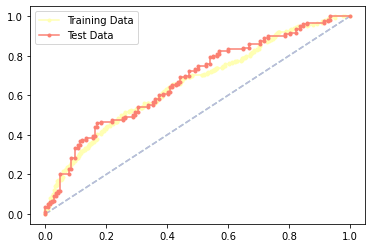

In [88]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()